# 1. Loading and Preprocessing

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# To load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target,name='target')

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in dataset:\n",missing_values)

Missing values in dataset:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [22]:
#Feature Scaling
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Explanation of Preprocessing Steps

Before applying any machine learning models, it is essential to inspect the dataset for missing values. Missing data can lead to incorrect model training or failure during execution since most machine learning algorithms cannot handle missing values directly.Here, there were no missing values in the dataset,so no imputation is necessary.However, this step is a standard and important part of any data preprocessing steps.

This dataset have different units and ranges,which can negatively impact model performance.To address this, we applied standardization technique.Standardizing feature values to bring all features to the same scale and improve model performance.StandardScaler was used to bring all features to the same scale (mean=0, std=1), which is essential for algorithms like SVM and k-NN.



These preprocessing steps are essential for accurate machine learning models, particularly in supervised learning tasks involving classification.



# 2.Classification Algorithm Implementation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }


1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

evaluate_model(y_test, y_pred_lr)



{'Accuracy': 0.9736842105263158,
 'Precision': 0.9722222222222222,
 'Recall': 0.9859154929577465,
 'F1 Score': 0.979020979020979}

How it works:

Logistic Regression is a linear model used for binary classification.It calculates the probability of class membership using the logistic (sigmoid) function, and applies a decision threshold (typically 0.5) to assign a class label.

Why Suitable:

1.Simple and effective for binary classification.

2.Provides interpretable results (feature coefficients).

3.Performs well when the relationship between input variables and the target is approximately linear.


2.Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

evaluate_model(y_test, y_pred_dt)


{'Accuracy': 0.9473684210526315,
 'Precision': 0.9577464788732394,
 'Recall': 0.9577464788732394,
 'F1 Score': 0.9577464788732394}

How It Works:

Decision Trees use a flowchart-like tree structure to split the dataset into subsets based on feature values.The goal is to maximize information gain (or minimize Gini impurity or entropy) at each split.

Why Suitable:

1.Captures complex nonlinear relationships.

2.No need for feature scaling.

3.Easy to visualize and interpret.



3.Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf)


{'Accuracy': 0.9649122807017544,
 'Precision': 0.958904109589041,
 'Recall': 0.9859154929577465,
 'F1 Score': 0.9722222222222222}

How It Works:

Random Forest is an ensemble method that builds multiple Decision Trees and averages their predictions.It reduces overfitting and improves accuracy by introducing randomness in feature selection and data sampling.

Why Suitable:

1.Handles high-dimensional data well.

2.Less prone to overfitting than a single Decision Tree.

3.Provides feature importance scores.

4.Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

evaluate_model(y_test, y_pred_svm)


{'Accuracy': 0.9736842105263158,
 'Precision': 0.9722222222222222,
 'Recall': 0.9859154929577465,
 'F1 Score': 0.979020979020979}

How It Works:
SVM finds the optimal hyperplane that maximizes the margin between two classes.It can use kernels (linear, RBF, etc.) to handle non-linearly separable data.

Why Suitable:
1.Effective in high-dimensional spaces.

2.Robust to outliers and works well with a clear margin of separation.

3.RBF kernel helps model nonlinear boundaries.



5.K-Nearest Neighbors (K-NN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

evaluate_model(y_test, y_pred_knn)


{'Accuracy': 0.9473684210526315,
 'Precision': 0.9577464788732394,
 'Recall': 0.9577464788732394,
 'F1 Score': 0.9577464788732394}

How It Works:

k-NN is a non-parametric, instance-based learning algorithm.It assigns a class label based on the majority vote among the k nearest data points (based on Euclidean distance).

Why Suitable:

1.Simple to implement and understand.

2.Effective for small to medium-sized datasets.

3.Sensitive to the local structure of the data (which can be useful for medical datasets like this one).




# 3. Model Comparison

In [29]:
results = {
    'Logistic Regression': evaluate_model(y_test, y_pred_lr),
    'Decision Tree': evaluate_model(y_test, y_pred_dt),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
    'SVM': evaluate_model(y_test, y_pred_svm),
    'k-NN': evaluate_model(y_test, y_pred_knn)
}

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.973684,0.972222,0.985915,0.979021
Decision Tree,0.947368,0.957746,0.957746,0.957746
Random Forest,0.964912,0.958904,0.985915,0.972222
SVM,0.973684,0.972222,0.985915,0.979021
k-NN,0.947368,0.957746,0.957746,0.957746


Visualization

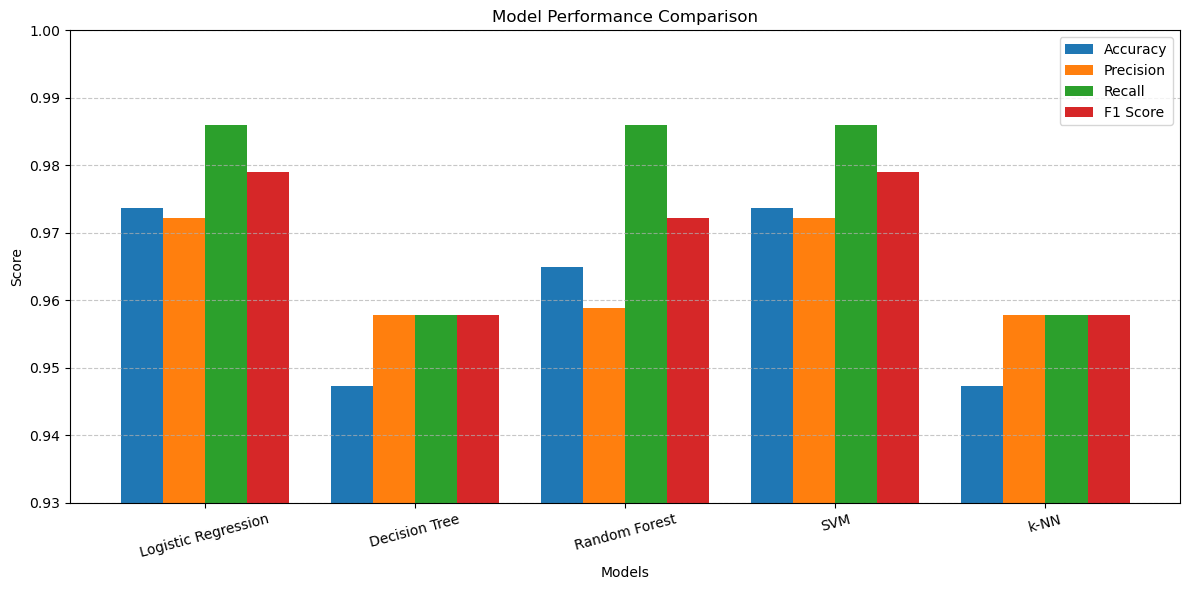

In [30]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']
results = [
    [0.973684, 0.972222, 0.985915, 0.979021],
    [0.947368, 0.957746, 0.957746, 0.957746],
    [0.964912, 0.958904, 0.985915, 0.972222],
    [0.973684, 0.972222, 0.985915, 0.979021],
    [0.947368, 0.957746, 0.957746, 0.957746],
]

results_array = np.array(results)

x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(12, 6))

for i in range(len(metrics)):
    plt.bar(x + i * bar_width, results_array[:, i], width=bar_width, label=metrics[i])

# Formatting
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + bar_width * 1.5, models, rotation=15)
plt.ylim(0.93, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Conclusion 

Among the five classification algorithms applied to the breast cancer dataset, Logistic Regression and Support Vector Machine (SVM) achieved the highest performance, both with an accuracy of 97.37% and an F1 score of 0.979. Their high precision and recall indicate strong overall balance and minimal false positives/negatives, making them highly reliable for this binary classification task.

Random Forest also performed well with 96.49% accuracy and an F1 score of 0.972, showing the benefits of ensemble learning in capturing complex patterns without overfitting.

On the other hand, Decision Tree and k-Nearest Neighbors (k-NN) showed comparatively lower performance, both with 94.74% accuracy and an F1 score of 0.957. These models may have been more sensitive to overfitting (Decision Tree) and high dimensionality or distance noise (k-NN).

Best Performed Algorithms: Logistic Regression and SVM

Worst Performed Algorithms: Decision Tree and k-NN